## Problem Statement
Uber has been a major source of travel for people living in urban areas. Some people don’t have their vehicles while some don’t drive their vehicles intentionally because of their busy schedule. So different kinds of people are using the services of Uber and other taxi services.By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns.

## Data
 The dataset I’m using here is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.

The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015. You can download the dataset here:https://github.com/amankharwal/Website-data/raw/master/uber-raw-data-sep14.csv.zip

## Importing necessary libraries
I will start this task of Uber trips analysis by importing the necessary Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/filename/uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup,let’s prepare the data that I am using here to analyze the Uber trips according to days and hours:

In [3]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


So I have prepared this data according to the days and hours, as I am using the Uber trips for the September month so let’s have a look at each day to see on which day the Uber trips were highest:

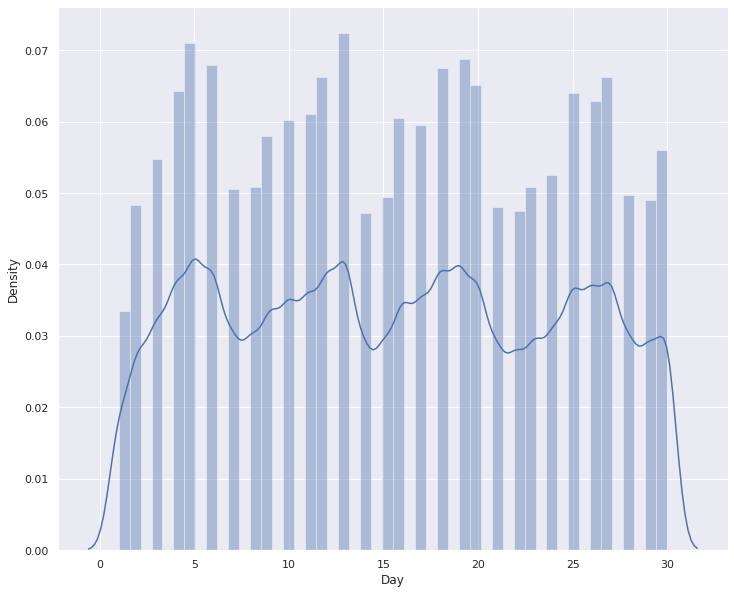

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.distributions")

sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let’s analyze the Uber trips according to the hours:

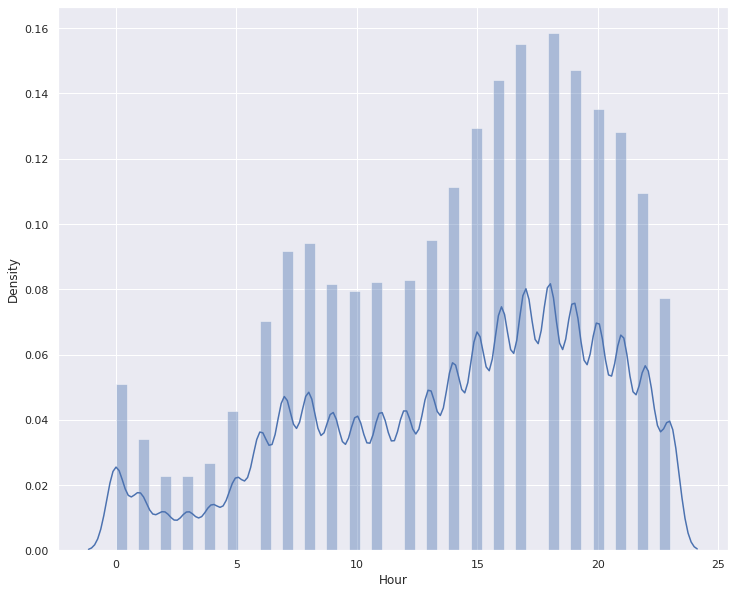

In [9]:
sns.distplot(data["Hour"]);

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays:

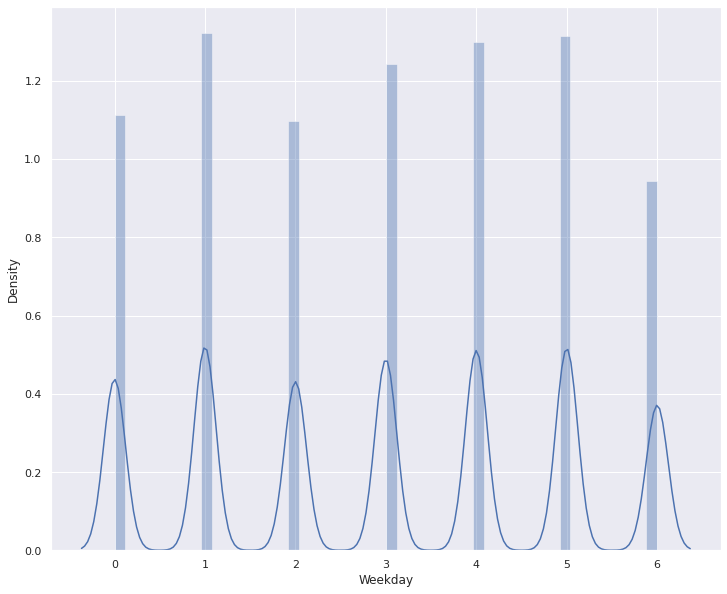

In [10]:
sns.distplot(data["Weekday"]);

In the above figure 0 indicates Sunday, on Sundays the Uber trips are more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. Now let’s have a look at the correlation of hours and weekdays on the Uber trips:



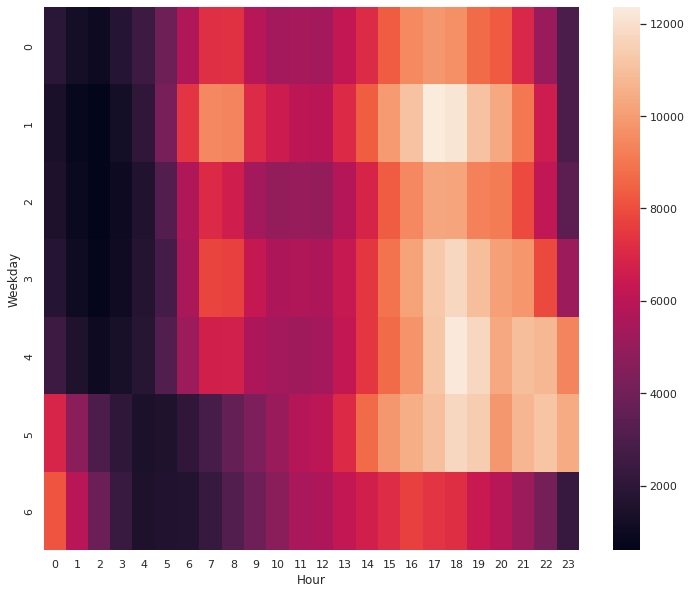

In [11]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False);

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New York city:

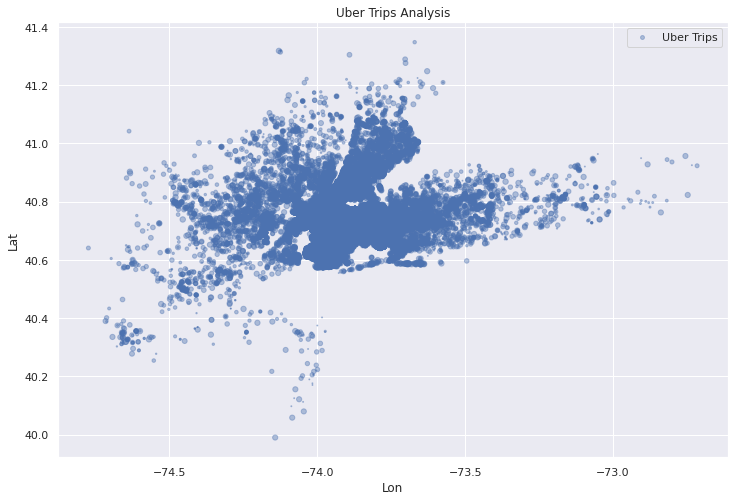

In [14]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

## Conclusion
So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1. Monday is the most profitable day for Uber
2. On Saturdays less number of people use Uber
3. 6 pm is the busiest day for Uber
4. On average a rise in Uber trips start around 5 am.